<a href="https://colab.research.google.com/github/jpalomino2025/ECUACIONES2/blob/main/Copia_de_Copia_de_01_Clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelació y Ajuste con Ecuaciones Diferenciales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

Tabla con datos reales y datos ajustados  

In [ ]:
# Datos reales
t_data = np.array([0, 1, 2, 3, 4, 5, 6])
I_data = np.array([100, 88, 75, 60, 54, 45, 37])

# Modelo corregido
def I_model(t, alpha):
    return 53 - 10.5 / alpha + (47 + 10.5 / alpha) * np.exp(-alpha * t)

# Ajuste de parámetro alpha
popt, _ = curve_fit(I_model, t_data, I_data, p0=0.1)
alpha_opt = popt[0]
print(f"Valor ajustado de alpha: {alpha_opt:.4f}")

# Evaluación del modelo en puntos reales
I_model_fit = I_model(t_data, alpha_opt)

# Crear tabla con pandas
tabla_resultados = pd.DataFrame({
    't': t_data,
    'I(t) real': I_data,
    'I(t) ajustado': np.round(I_model_fit, 2),
    'Error absoluto': np.round(np.abs(I_data - I_model_fit), 2)
})

print("\nTabla comparativa:")
print(tabla_resultados)


Valor ajustado de alpha: 0.0488

Tabla comparativa:
   t  I(t) real  I(t) ajustado  Error absoluto
0  0        100         100.00            0.00
1  1         88          87.51            0.49
2  2         75          75.62            0.62
3  3         60          64.30            4.30
4  4         54          53.51            0.49
5  5         45          43.24            1.76
6  6         37          33.46            3.54


Grafica de los valores reales y los valores Ajustados

Valor ajustado de alpha: 0.0488


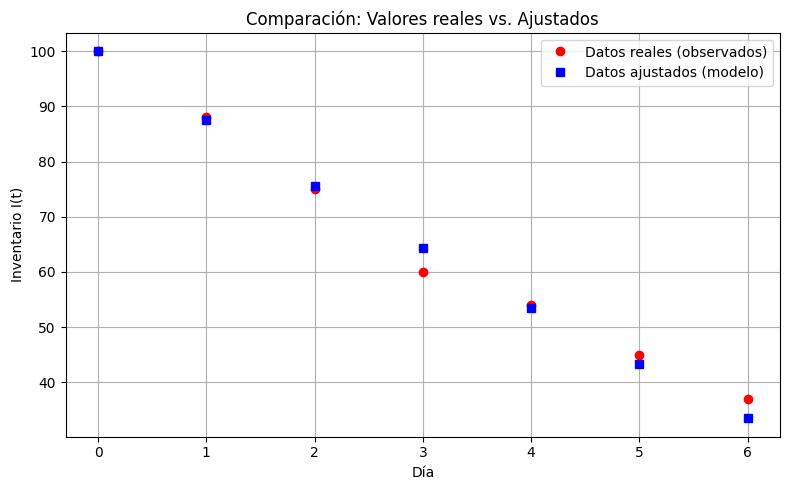

In [ ]:

from scipy.optimize import curve_fit

# Datos reales
t_data = np.array([0, 1, 2, 3, 4, 5, 6])
I_data = np.array([100, 88, 75, 60, 54, 45, 37])

# Modelo corregido
def I_model(t, alpha):
    return 53 - 10.5 / alpha + (47 + 10.5 / alpha) * np.exp(-alpha * t)

# Ajuste del parámetro alpha usando mínimos cuadrados
popt, _ = curve_fit(I_model, t_data, I_data, p0=0.1)
alpha_opt = popt[0]
print(f"Valor ajustado de alpha: {alpha_opt:.4f}")

# Evaluación del modelo con los t reales
I_model_fit = I_model(t_data, alpha_opt)

# Gráfica de puntos observados y ajustados
plt.figure(figsize=(8, 5))
plt.plot(t_data, I_data, 'ro', label='Datos reales (observados)')
plt.plot(t_data, I_model_fit, 'bs', label='Datos ajustados (modelo)')
plt.xlabel('Día')
plt.ylabel('Inventario I(t)')
plt.title('Comparación: Valores reales vs. Ajustados')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Grafica del modelo y valores reales

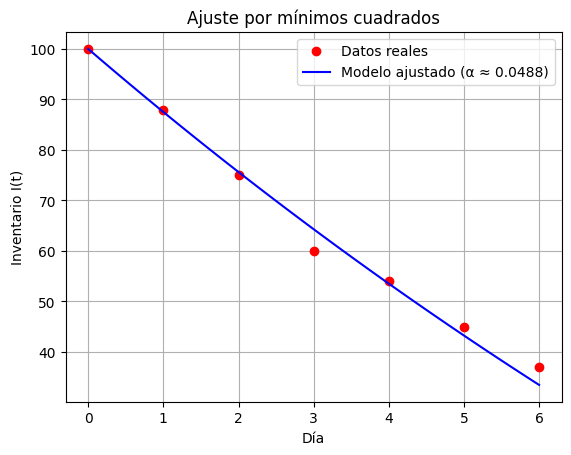

In [ ]:
# Gráfica
t_fit = np.linspace(0, 6, 100)
I_fit = I_model(t_fit, alpha_opt)

plt.plot(t_data, I_data, 'ro', label='Datos reales')
plt.plot(t_fit, I_fit, 'b-', label=f'Modelo ajustado (α ≈ {alpha_opt:.4f})')
plt.xlabel('Día')
plt.ylabel('Inventario I(t)')
plt.title('Ajuste por mínimos cuadrados')
plt.grid(True)
plt.legend()
plt.show()

Comparación gráfica entre los dos modelos y los datos reales

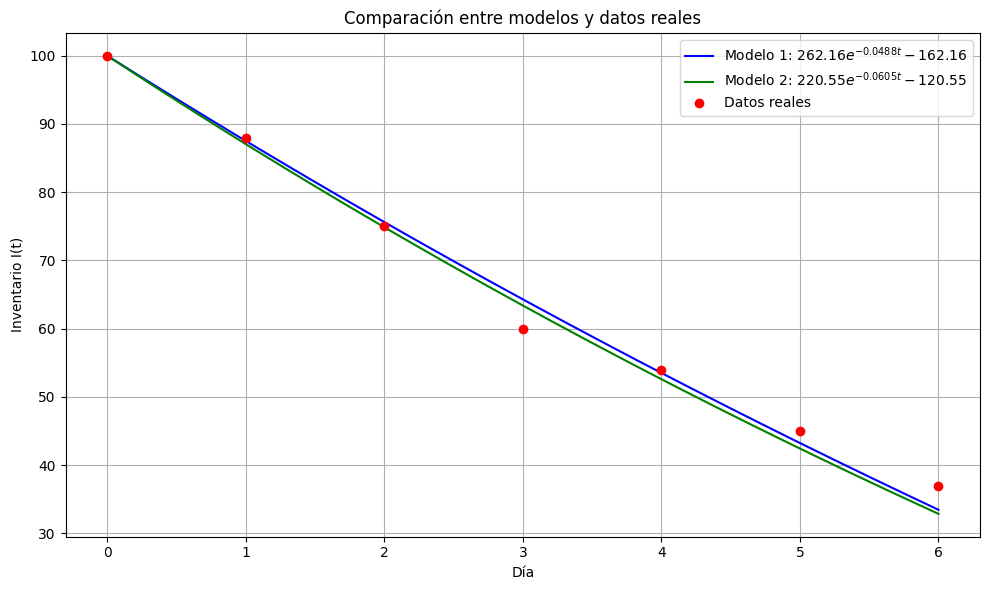

In [ ]:
# Días (dominio para modelos continuos)
t = np.linspace(0, 6, 200)
t_data = np.array([0, 1, 2, 3, 4, 5, 6])
I_data = np.array([100, 88, 75, 60, 54, 45, 37])

# Modelo 1: I(t) = 262.16 * e^(-0.0488t) - 162.16
def modelo_1(t):
    return 262.16 * np.exp(-0.0488 * t) - 162.16

# Modelo 2: I(t) = 220.55 * e^(-0.0605t) - 120.55
def modelo_2(t):
    return 220.55 * np.exp(-0.0605 * t) - 120.55

# Evaluar modelos
I_modelo_1 = modelo_1(t)
I_modelo_2 = modelo_2(t)

# Graficar
plt.figure(figsize=(10, 6))

plt.plot(t, I_modelo_1, 'b-', label='Modelo 1: $262.16e^{-0.0488t} - 162.16$')
plt.plot(t, I_modelo_2, 'g-', label='Modelo 2: $220.55e^{-0.0605t} - 120.55$')
plt.plot(t_data, I_data, 'ro', label='Datos reales')

plt.xlabel('Día')
plt.ylabel('Inventario I(t)')
plt.title('Comparación entre modelos y datos reales')
plt.grid(True)
plt.legend()
plt.xticks(t_data)
plt.tight_layout()
plt.show()

In [ ]:
SISTEMA DE INVENTARIO ADMINISTRADO POR EL PROVEEDOR  DE UNA CAPA CON REPOSICIÓN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos observados
t_data = np.array(range(21))
I_data = np.array([
    100, 88, 75, 60, 54, 45, 37,
    108, 96, 83, 70, 68, 62, 53,
    108, 96, 83, 68, 62, 53, 45
])

# Función por tramos T(t)
def T(t):
    if 0 <= t < 7:
        return 262.95 * np.exp(-0.0488 * t) - 162.95
    elif 7 <= t < 14:
        return 381.46 * np.exp(-0.0322 * (t - 7)) - 273.46
    elif 14 <= t < 21:
        return 381.46 * np.exp(-0.0322 * (t - 14)) - 273.46
    else:
        return np.nan

# Aplicar modelo a cada valor de t
T_model = np.array([T(t) for t in t_data])

# Tabla comparativa
tabla = pd.DataFrame({
    't': t_data,
    'Inventario real': I_data,
    'Modelo ajustado': np.round(T_model, 2),
    'Error absoluto': np.round(np.abs(I_data - T_model), 2)
})
print(tabla)


     t  Inventario real  Modelo ajustado  Error absoluto
0    0              100           100.00            0.00
1    1               88            87.48            0.52
2    2               75            75.55            0.55
3    3               60            64.19            4.19
4    4               54            53.37            0.63
5    5               45            43.07            1.93
6    6               37            33.26            3.74
7    7              108           108.00            0.00
8    8               96            95.91            0.09
9    9               83            84.21            1.21
10  10               70            72.87            2.87
11  11               68            61.90            6.10
12  12               62            51.27           10.73
13  13               53            40.98           12.02
14  14              108           108.00            0.00
15  15               96            95.91            0.09
16  16               83        

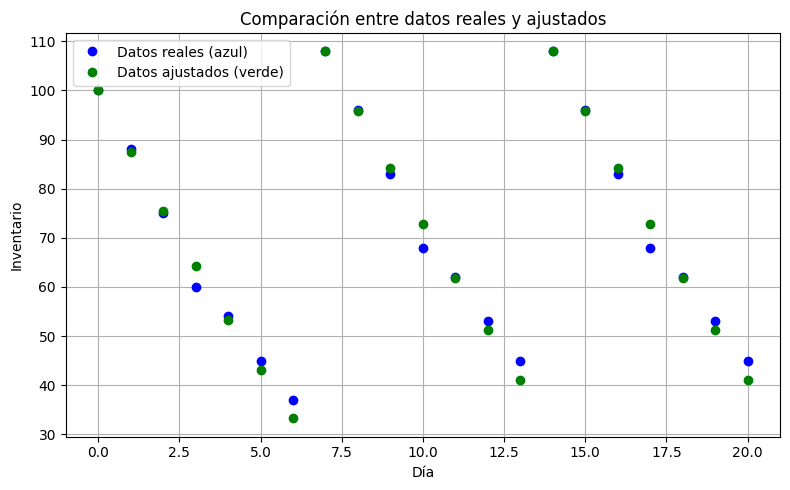

In [ ]:
# Datos reales del inventario
t_real = np.arange(21)
I_real = np.array([
    100, 88, 75, 60, 54, 45, 37,
    108, 96, 83, 68, 62, 53, 45,
    108, 96, 83, 68, 62, 53, 45
])

# Definir la función por tramos T(t)
def T(t):
    if 0 <= t < 7:
        return 262.95 * np.exp(-0.0488 * t) - 162.95
    elif 7 <= t < 14:
        return 381.46 * np.exp(-0.0322 * (t - 7)) - 273.46
    elif 14 <= t < 21:
        return 381.46 * np.exp(-0.0322 * (t - 14)) - 273.46
    else:
        return np.nan  # Por si t está fuera del rango esperado

# Vectorizar la función para aplicarla a arrays
T_vectorized = np.vectorize(T)
I_model = T_vectorized(t_real)

# Graficar puntos reales y ajustados
plt.figure(figsize=(8, 5))
plt.plot(t_real, I_real, 'bo', label='Datos reales (azul)')
plt.plot(t_real, I_model, 'go', label='Datos ajustados (verde)')
plt.xlabel('Día')
plt.ylabel('Inventario')
plt.title('Comparación entre datos reales y ajustados')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Graficas de los datos reales y valores ajustados

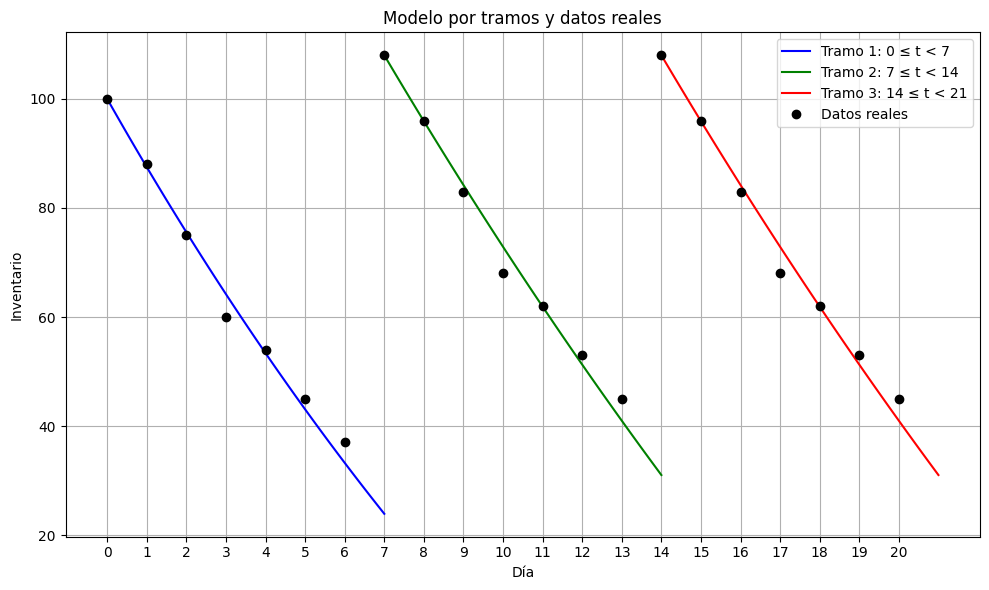

In [5]:
# Datos reales del inventario
t_real = np.arange(21)
I_real = np.array([
    100, 88, 75, 60, 54, 45, 37,
    108, 96, 83, 68, 62, 53, 45,
    108, 96, 83, 68, 62, 53, 45
])

# Funciones por tramos definidas por separado
def T1(t):  # Para 0 <= t < 7
    return 262.95 * np.exp(-0.0488 * t) - 162.95

def T2(t):  # Para 7 <= t < 14
    return 381.46 * np.exp(-0.0322 * (t - 7)) - 273.46

def T3(t):  # Para 14 <= t < 21
    return 381.46 * np.exp(-0.0322 * (t - 14)) - 273.46

# Intervalos para cada tramo (con más puntos para suavidad)
t1 = np.linspace(0, 7, 100)
t2 = np.linspace(7, 14, 100)
t3 = np.linspace(14, 21, 100)

# Evaluar funciones
I1 = T1(t1)
I2 = T2(t2)
I3 = T3(t3)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t1, I1, 'b-', label='Tramo 1: 0 ≤ t < 7')
plt.plot(t2, I2, 'g-', label='Tramo 2: 7 ≤ t < 14')
plt.plot(t3, I3, 'r-', label='Tramo 3: 14 ≤ t < 21')
plt.plot(t_real, I_real, 'ko', label='Datos reales')

# Ejes y formato
plt.xlabel('Día')
plt.ylabel('Inventario')
plt.title('Modelo por tramos y datos reales')
plt.grid(True)
plt.xticks(t_real)  # Mostrar solo enteros como marcas del eje x
plt.legend()
plt.tight_layout()
plt.show()

SISTEMA DE INVENTARIO ADMINISTRADO POR EL PROVEEDOR DE DOS CAPAS

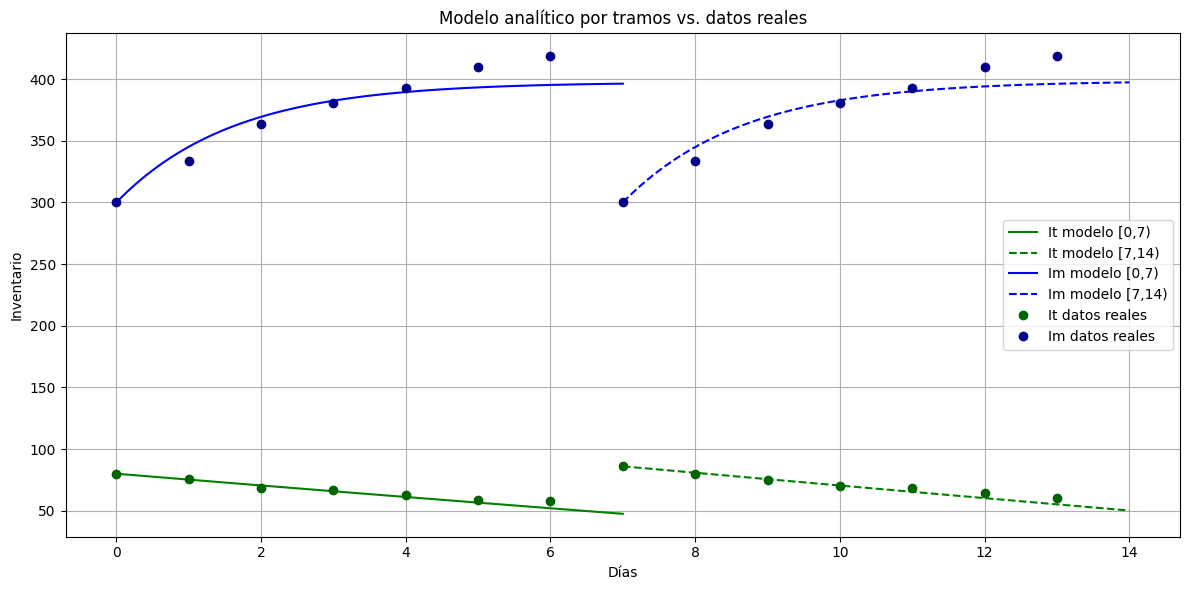

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos reales
dias = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
It_datos = np.array([80,76,68,67,63,59,58,86,80,75,70,68,64,60])
Im_datos = np.array([300,334,364,381,393,410,419,300,334,364,381,393,410,419])

# Parámetros ajustados por tramo
k1_1, k2_1 = 0.0099, 0.6148  # tramo [0,7)
k1_2, k2_2 = 0.0066, 0.6021  # tramo [7,14)

# Constantes del modelo
D = 6
Idt = 200
Idm = 400

# Solución analítica de It(t)
def It_analitico(t, It0, k1):
    It_inf = Idt - D / k1
    return (It0 - It_inf) * np.exp(-k1 * t) + It_inf

# Solución numérica de Im(t)
def Im_analitico(t, It_func, Im0, k1, k2):
    dt = 0.01
    t_vals = np.arange(0, max(t)+dt, dt)
    Im_vals = [Im0]
    for i in range(1, len(t_vals)):
        ti = t_vals[i-1]
        Ii = Im_vals[-1]
        Iti = It_func(ti)
        dIm = k2*(Idm - Ii) - k1*(Idt - Iti)
        Im_vals.append(Ii + dIm * dt)
    return np.interp(t, t_vals, Im_vals)

# Intervalo [0,7)
t1 = np.linspace(0, 7, 100)
It0_1, Im0_1 = It_datos[0], Im_datos[0]
It1 = It_analitico(t1, It0_1, k1_1)
It_func1 = lambda t: It_analitico(t, It0_1, k1_1)
Im1 = Im_analitico(t1, It_func1, Im0_1, k1_1, k2_1)

# Intervalo [7,14)
t2 = np.linspace(7, 14, 100)
It0_2, Im0_2 = It_datos[7], Im_datos[7]
It2 = It_analitico(t2 - 7, It0_2, k1_2)
It_func2 = lambda t: It_analitico(t - 7, It0_2, k1_2)
Im2 = Im_analitico(t2 - 7, It_func2, Im0_2, k1_2, k2_2)

# Graficar
plt.figure(figsize=(12, 6))

# Modelo analítico
plt.plot(t1, It1, 'g-', label='It modelo [0,7)')
plt.plot(t2, It2, 'g--', label='It modelo [7,14)')
plt.plot(t1, Im1, 'b-', label='Im modelo [0,7)')
plt.plot(t2, Im2, 'b--', label='Im modelo [7,14)')

# Datos reales
plt.plot(dias, It_datos, 'o', color='darkgreen', label='It datos reales')
plt.plot(dias, Im_datos, 'o', color='darkblue', label='Im datos reales')

# Estética
plt.xlabel('Días')
plt.ylabel('Inventario')
plt.title('Modelo analítico por tramos vs. datos reales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Datos reales
dias = np.arange(14)
It_reales = np.array([80, 76, 68, 67, 63, 59, 58, 86, 80, 75, 70, 68, 64, 60])
Im_reales = np.array([300, 334, 364, 381, 393, 410, 419, 300, 334, 364, 381, 393, 410, 419])

# Modelo It por tramos
def It_1(t):  # para t en [0,7)
    return 486.06 * np.exp(-0.0099 * t) - 406.06

def It_2(t):  # para t en [7,14]
    return 795.09 * np.exp(-0.0066 * (t - 7)) - 709.09

# Modelo Im por tramos
def Im_1(t):  # para t en [0,7)
    return np.exp(-0.6148 * t) * (
        300 + 690.0 * (np.exp(0.6148 * t) - 1) + 7.96 * (np.exp(0.6049 * t) - 1)
    )

def Im_2(t):  # para t en [7,14]
    tau = t - 7
    return np.exp(-0.6021 * tau) * (
        300 + 690.2 * (np.exp(0.6021 * tau) - 1) + 8.81 * (np.exp(0.5955 * tau) - 1)
    )

# Evaluación por tramos
It_modelo = np.array([It_1(t) if t < 7 else It_2(t) for t in dias])
Im_modelo = np.array([Im_1(t) if t < 7 else Im_2(t) for t in dias])

# Tabla con resultados
tabla = pd.DataFrame({
    'Día': dias,
    'It_real': It_reales,
    'It_modelo': It_modelo.round(2),
    'Im_real': Im_reales,
    'Im_modelo': Im_modelo.round(2)
})

# Mostrar tabla
print(tabla)

    Día  It_real  It_modelo  Im_real  Im_modelo
0     0       80      80.00      300     300.00
1     1       76      75.21      334     482.69
2     2       68      70.47      364     581.44
3     3       67      65.78      381     634.80
4     4       63      61.13      393     663.62
5     5       59      56.53      410     679.18
6     6       58      51.97      419     687.55
7     7       86      86.00      300     300.00
8     8       80      80.77      334     480.43
9     9       75      75.57      364     579.22
10   10       70      70.41      381     633.30
11   11       68      65.28      393     662.89
12   12       64      60.19      410     679.07
13   13       60      55.13      419     687.90


Valor ajustado de alpha: 0.0488


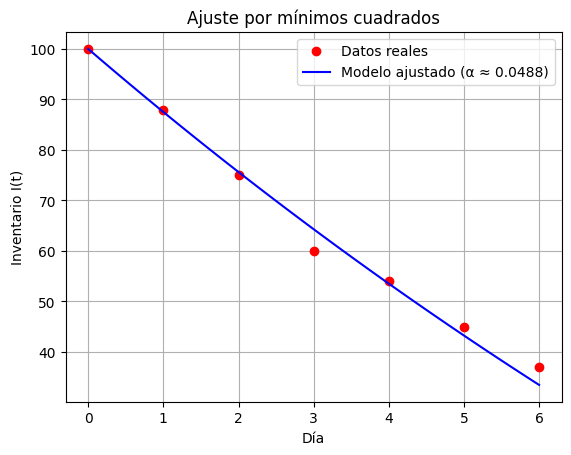

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos reales
t_data = np.array([0, 1, 2, 3, 4, 5, 6])
I_data = np.array([100, 88, 75, 60, 54, 45, 37])

# Modelo corregido
def I_model(t, alpha):
    return 53 - 10.5 / alpha + (47 + 10.5 / alpha) * np.exp(-alpha * t)

# Ajuste de parámetro alpha
popt, _ = curve_fit(I_model, t_data, I_data, p0=0.1)
alpha_opt = popt[0]
print(f"Valor ajustado de alpha: {alpha_opt:.4f}")

# Evaluación del modelo con el parámetro ajustado
t_fit = np.linspace(0, 6, 100)
I_fit = I_model(t_fit, alpha_opt)

# Graficar
plt.plot(t_data, I_data, 'ro', label='Datos reales')
plt.plot(t_fit, I_fit, 'b-', label=f'Modelo ajustado (α ≈ {alpha_opt:.4f})')
plt.xlabel('Día')
plt.ylabel('Inventario I(t)')
plt.title('Ajuste por mínimos cuadrados')
plt.grid(True)
plt.legend()
plt.show()

Valor ajustado de alpha: 0.0488


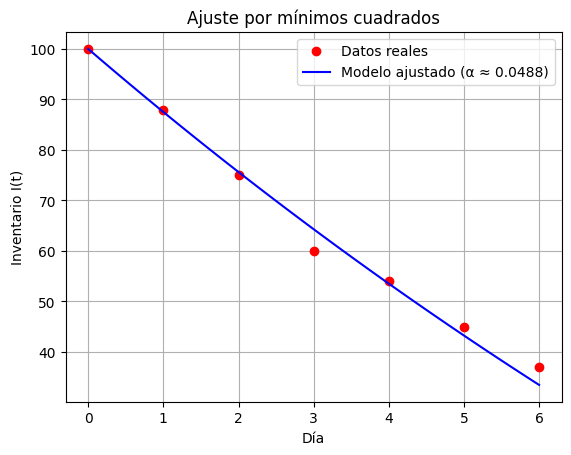

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos reales
t_data = np.array([0, 1, 2, 3, 4, 5, 6])
I_data = np.array([100, 88, 75, 60, 54, 45, 37])

# Modelo corregido
def I_model(t, alpha):
    return 53 - 10.5 / alpha + (47 + 10.5 / alpha) * np.exp(-alpha * t)

# Ajuste de parámetro alpha
popt, _ = curve_fit(I_model, t_data, I_data, p0=0.1)
alpha_opt = popt[0]
print(f"Valor ajustado de alpha: {alpha_opt:.4f}")

# Evaluación del modelo con el parámetro ajustado
t_fit = np.linspace(0, 6, 100)
I_fit = I_model(t_fit, alpha_opt)

# Graficar
plt.plot(t_data, I_data, 'ro', label='Datos reales')
plt.plot(t_fit, I_fit, 'b-', label=f'Modelo ajustado (α ≈ {alpha_opt:.4f})')
plt.xlabel('Día')
plt.ylabel('Inventario I(t)')
plt.title('Ajuste por mínimos cuadrados')
plt.grid(True)
plt.legend()
plt.show()


Valor ajustado de k: 0.0172


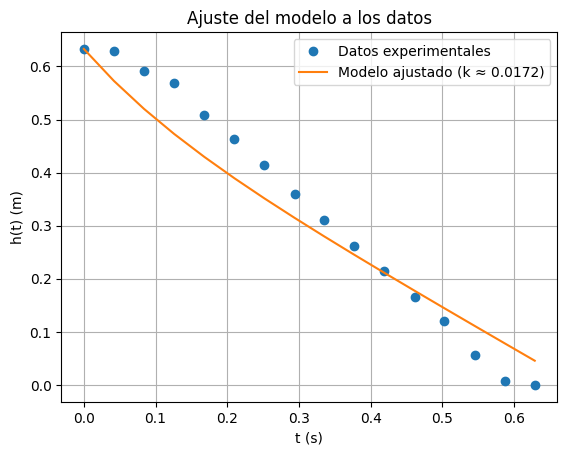

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos dados
t_data = np.array([0.000, 0.042, 0.084, 0.126, 0.168, 0.210, 0.252, 0.294,
                   0.335, 0.377, 0.419, 0.462, 0.503, 0.545, 0.587, 0.629])
h_data = np.array([0.633, 0.629, 0.592, 0.568, 0.508, 0.463, 0.415, 0.359,
                   0.310, 0.262, 0.214, 0.165, 0.121, 0.056, 0.008, 0.000])

# Modelo h(t)
def h_model(t, k):
    return (0.013279 / k) * (-t + (0.00226 / k) * (np.exp(-k / 0.00226 * t) - 1)) + 0.633

# Función de error
def error(k):
    return np.sum((h_model(t_data, k[0]) - h_data)**2)

# Minimización
res = minimize(error, x0=[1.0], bounds=[(0.01, 50)])
k_opt = res.x[0]
print(f"Valor ajustado de k: {k_opt:.4f}")

# Graficar
import matplotlib.pyplot as plt
plt.plot(t_data, h_data, 'o', label="Datos experimentales")
plt.plot(t_data, h_model(t_data, k_opt), '-', label=f"Modelo ajustado (k ≈ {k_opt:.4f})")
plt.xlabel("t (s)")
plt.ylabel("h(t) (m)")
plt.legend()
plt.grid(True)
plt.title("Ajuste del modelo a los datos")
plt.show()

In [ ]:
def h(t, k):
    num = 0.013279
    mf = 0.00226
    return (num / k) * (-t + (mf / k) * np.exp(-k * t / mf) - (mf / k)) + 0.633

print("h(0) =", h(0, k=0.0207))  # Usa el valor ajustado de k

h(0) = 0.633


Valor óptimo de k: 0.0172


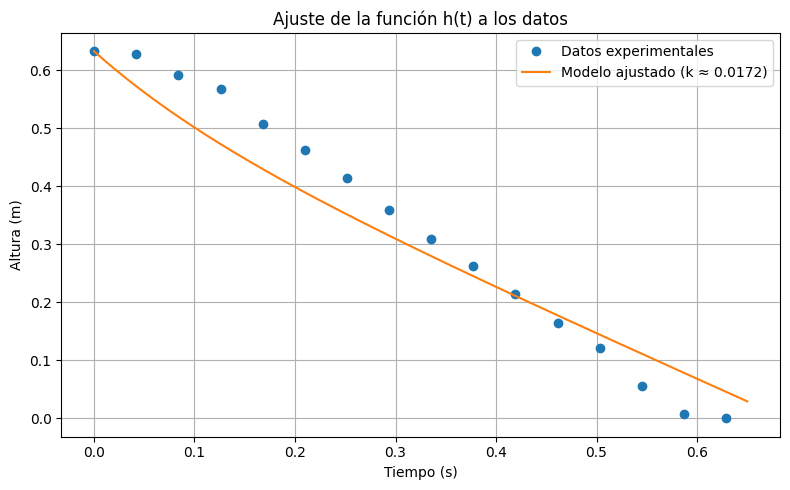

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos experimentales
t_data = np.array([0.000, 0.042, 0.084, 0.126, 0.168, 0.210, 0.252,
                   0.294, 0.335, 0.377, 0.419, 0.462, 0.503, 0.545,
                   0.587, 0.629])
h_data = np.array([0.633, 0.629, 0.592, 0.568, 0.508, 0.463, 0.415,
                   0.359, 0.310, 0.262, 0.214, 0.165, 0.121, 0.056,
                   0.008, 0.000])

# Definimos la función modelo
def h_model(t, k):
    A = 0.013279
    m = 0.00226
    return (A / k) * (-t + (m / k) * np.exp(-k * t / m) - (m / k)) + 0.633

# Función objetivo (suma de los cuadrados de los errores)
def error(k):
    h_pred = h_model(t_data, k[0])
    return np.sum((h_pred - h_data) ** 2)

# Optimización para encontrar el mejor k
res = minimize(error, x0=[0.01], bounds=[(0.001, 1)])
k_opt = res.x[0]
print(f"Valor óptimo de k: {k_opt:.4f}")

# Graficamos los datos y el modelo ajustado
t_plot = np.linspace(0, 0.65, 200)
h_plot = h_model(t_plot, k_opt)

plt.figure(figsize=(8, 5))
plt.plot(t_data, h_data, 'o', label='Datos experimentales')
plt.plot(t_plot, h_plot, '-', label=f'Modelo ajustado (k ≈ {k_opt:.4f})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Ajuste de la función h(t) a los datos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Valor óptimo de k: 2.6238


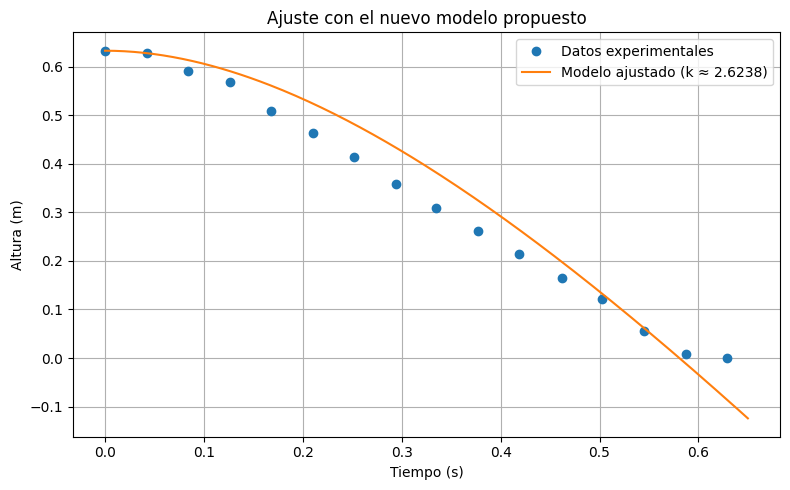

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos experimentales
t_data = np.array([0.000, 0.042, 0.084, 0.126, 0.168, 0.210, 0.252,
                   0.294, 0.335, 0.377, 0.419, 0.462, 0.503, 0.545,
                   0.587, 0.629])
h_data = np.array([0.633, 0.629, 0.592, 0.568, 0.508, 0.463, 0.415,
                   0.359, 0.310, 0.262, 0.214, 0.165, 0.121, 0.056,
                   0.008, 0.000])

# Función del modelo
def h_model(t, k):
    A = 5.8757
    return 0.633 - (A / k) * t - (A / k**2) * np.exp(-k * t) + (A / k**2)

# Error cuadrático
def error(k):
    h_pred = h_model(t_data, k[0])
    return np.sum((h_pred - h_data) ** 2)

# Optimización
res = minimize(error, x0=[1.0], bounds=[(0.01, 20)])
k_opt = res.x[0]
print(f"Valor óptimo de k: {k_opt:.4f}")

# Gráfica
t_plot = np.linspace(0, 0.65, 200)
h_plot = h_model(t_plot, k_opt)

plt.figure(figsize=(8, 5))
plt.plot(t_data, h_data, 'o', label='Datos experimentales')
plt.plot(t_plot, h_plot, '-', label=f'Modelo ajustado (k ≈ {k_opt:.4f})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Ajuste con el nuevo modelo propuesto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()